**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**EDA Train Test Split**
The metadata of the tf records was captures from the frames. The tf records were split into train and eval based on metadata such as location, time of day and weather.

Each tf record file has around 199 images. The train set has 202 such tf records, the eval set has 72 such tfrecords.

Metadata has been extracted from frames contect from waymo data. The timeofday,location and weatehr has been extracted and this has been used to split the data into train and eval sets.

The pie charts in the notebook below show the composition of train and eval datasets.

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/data_dir/train.csv'
df_train_meta= pd.read_csv(path,sep=',',header=None)
df_train_meta.columns = ['sno','fname','TimeofDay','location','weather','veh','ped','cyc','tot_frames']

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/data_dir/eval.csv'
df_eval_meta= pd.read_csv(path,sep=',',header=None)
df_eval_meta.columns = ['sno','fname','TimeofDay','location','weather','veh','ped','cyc','tot_frames']

In [ ]:
import glob
path= '/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/'
fn_train = glob.glob(path+'*.tfrecord')

In [ ]:
import glob
path= '/content/drive/MyDrive/nd013-c1-vision-starter/data_new/eval/'
fn_eval = glob.glob(path+'*.tfrecord')

In [ ]:
ltrain=[]
for f in fn_train:
  ltrain.append(f[62:])


In [ ]:
leval=[]
for f in fn_eval:
  leval.append(f[61:])


In [ ]:
df_train_meta=df_train_meta[df_train_meta.fname.isin(ltrain)]

In [ ]:
df_eval_meta=df_eval_meta[df_eval_meta.fname.isin(leval)]

In [ ]:
df_train_meta.head()

,sno,fname,TimeofDay,location,weather,veh,ped,cyc,tot_frames
1,1.0,segment-10023947602400723454_1120_000_1140_000...,Day,location_sf,sunny,4462,3871,31,198
2,7.0,segment-10082223140073588526_6140_000_6160_000...,Night,location_sf,sunny,2799,539,0,196
3,10.0,segment-10107710434105775874_760_000_780_000_w...,Dawn/Dusk,location_sf,sunny,621,0,0,198
4,12.0,segment-10206293520369375008_2796_800_2816_800...,Night,location_phx,sunny,881,78,0,197
5,13.0,segment-10212406498497081993_5300_000_5320_000...,Dawn/Dusk,location_sf,sunny,3824,751,0,197


In [ ]:
def df_plot(df,name):
  (df_train.value_counts(subset=[name])).index
  loc=(df_train.value_counts(subset=[name]))
  l1=pd.DataFrame.from_dict(loc)
  l1.plot.pie(y=0)

**Train Data Split Charts**
by
*   Time of Day
*   Weather
*   Location








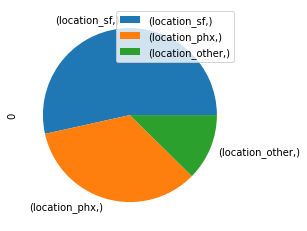

In [ ]:
df_plot(df_train_meta,'location')

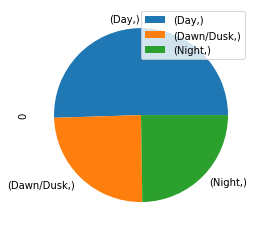

In [ ]:
df_plot(df_train_meta,'TimeofDay')

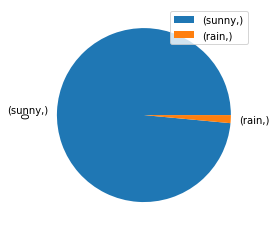

In [ ]:
df_plot(df_train_meta,'weather')

**Evaluation Data Split Charts**
by
*   Time of Day
*   Weather
*   Location

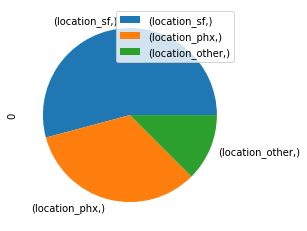

In [ ]:
df_plot(df_eval_meta,'location')

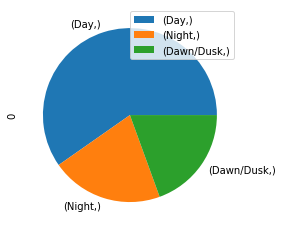

In [ ]:
df_plot(df_eval_meta,'TimeofDay')

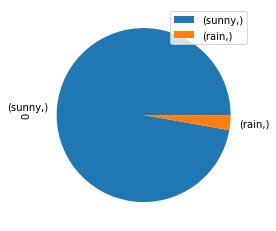

In [ ]:
df_plot(df_eval_meta,'weather')

In [ ]:
df[df['location']=='location_phx']

,fname,TimeofDay,location,weather,veh,ped,cyc,tot_frames
2,segment-1005081002024129653_5313_150_5333_150_...,Day,location_phx,sunny,2799,272,0,198
5,segment-10072231702153043603_5725_000_5745_000...,Day,location_phx,sunny,1066,97,0,197
11,segment-10153695247769592104_787_000_807_000_w...,Day,location_phx,sunny,6411,0,0,197
12,segment-10206293520369375008_2796_800_2816_800...,Night,location_phx,sunny,881,78,0,197
14,segment-1022527355599519580_4866_960_4886_960_...,Day,location_phx,sunny,4915,1790,0,197
...,...,...,...,...,...,...,...,...
264,segment-16511546224219511043_6226_000_6246_000...,Dawn/Dusk,location_phx,rain,922,0,0,198
266,segment-16552287303455735122_7587_380_7607_380...,Dawn/Dusk,location_phx,sunny,3139,196,0,198
271,segment-16625429321676352815_1543_860_1563_860...,Day,location_phx,sunny,1117,301,252,198
274,segment-16651261238721788858_2365_000_2385_000...,Day,location_phx,sunny,6011,0,0,198


In [ ]:
df[df['location']=='location_other']

,fname,TimeofDay,location,weather,veh,ped,cyc,tot_frames
51,segment-10975280749486260148_940_000_960_000_w...,Night,location_other,sunny,1079,0,0,188
53,segment-11017034898130016754_697_830_717_830_w...,Dawn/Dusk,location_other,sunny,1623,53,97,196
56,segment-11076364019363412893_1711_000_1731_000...,Day,location_other,sunny,1155,0,0,194
70,segment-11388947676680954806_5427_320_5447_320...,Day,location_other,sunny,5024,1208,0,197
74,segment-11486225968269855324_92_000_112_000_wi...,Day,location_other,sunny,2570,9,0,198
99,segment-12200383401366682847_2552_140_2572_140...,Night,location_other,sunny,1326,0,0,198
106,segment-12303641360375776820_4378_000_4398_000...,Night,location_other,sunny,1854,0,0,198
113,segment-12473470522729755785_4000_000_4020_000...,Day,location_other,sunny,2144,64,0,198
115,segment-12511696717465549299_4209_630_4229_630...,Day,location_other,sunny,4479,0,0,196
118,segment-12566399510596872945_2078_320_2098_320...,Day,location_other,sunny,2731,3018,0,197


In [ ]:
df[df['location']=='location_sf']

,fname,TimeofDay,location,weather,veh,ped,cyc,tot_frames
0,segment-10017090168044687777_6380_000_6400_000...,Day,location_sf,sunny,2127,0,0,197
1,segment-10023947602400723454_1120_000_1140_000...,Day,location_sf,sunny,4462,3871,31,198
3,segment-10061305430875486848_1080_000_1100_000...,Day,location_sf,sunny,2052,109,0,197
4,segment-10072140764565668044_4060_000_4080_000...,Day,location_sf,sunny,10226,1281,0,197
6,segment-10075870402459732738_1060_000_1080_000...,Day,location_sf,sunny,2856,0,0,198
...,...,...,...,...,...,...,...,...
279,segment-16793466851577046940_2800_000_2820_000...,Day,location_sf,sunny,7900,5079,0,197
281,segment-16801666784196221098_2480_000_2500_000...,Day,location_sf,sunny,1853,98,55,198
282,segment-16873108320324977627_780_000_800_000_w...,Day,location_sf,sunny,5515,5109,87,198
283,segment-16911037681440249335_700_000_720_000_w...,Day,location_sf,sunny,1931,22,0,198
